#Support Vector Machines (SVM) Introduction - Machine Learning

* Tutorial: https://news.towardsai.net/svm
* Github: https://github.com/towardsai/tutorials/tree/master/support-vector-machine-svm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#classic datasets from sklearn library
from sklearn import datasets

from sklearn.model_selection import train_test_split

#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

#different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

## Load data

In [2]:
#loading WINE dataset
cancer_data = datasets.load_wine()

#converting into DataFrame
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df['target'] = cancer_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory data analysis

/opt/anaconda3/envs/torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


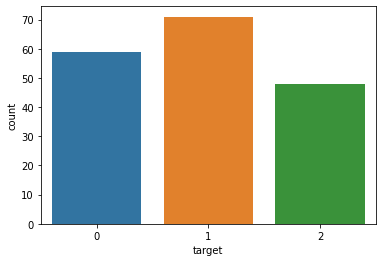

In [3]:
#analysing target variable 
sns.countplot(df.target)
plt.show()

## Splitting data

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

In [8]:
#splitting data into 80:20 train test ratio
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [17]:
X.shape,y.shape

((178, 13), (178,))

In [9]:
X_train.shape, y_train.shape

((133, 13), (133,))

In [10]:
X_test.shape, y_test.shape

((45, 13), (45,))

## Model training and performance evaluation

In [24]:
#training SVM model with linear kernel
model = SVC(kernel='linear',random_state = 10)
model.fit(X_train, y_train)

#predicting output for test data
pred = model.predict(X_test)

In [25]:
print(model.score(X_test, y_test))

0.8666666666666667


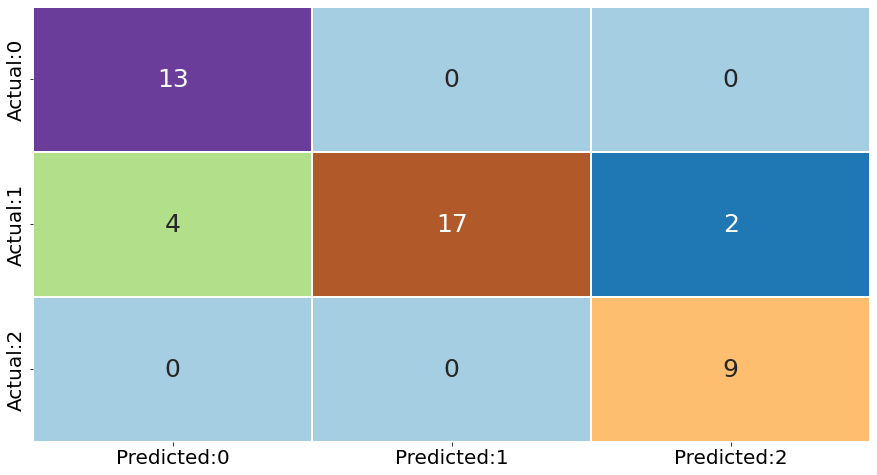

In [26]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)

#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]

#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2'], index = ['Actual:0','Actual:1', 'Actual:2'])

#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.74      0.85        23
           2       0.82      1.00      0.90         9

    accuracy                           0.87        45
   macro avg       0.86      0.91      0.87        45
weighted avg       0.90      0.87      0.86        45



In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#predicting output for test data
pred = knn.predict(X_test)

In [46]:
print(knn.score(X_test, y_test))

0.6666666666666666


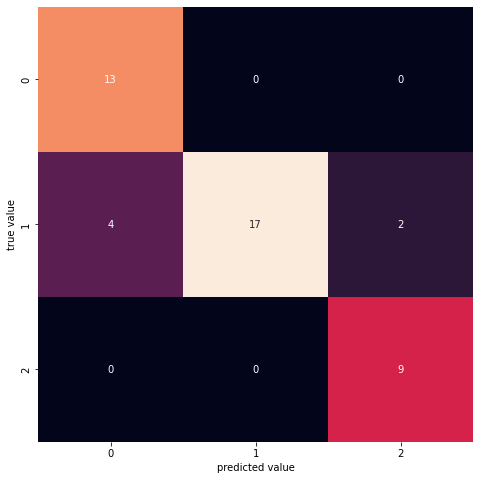

In [35]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

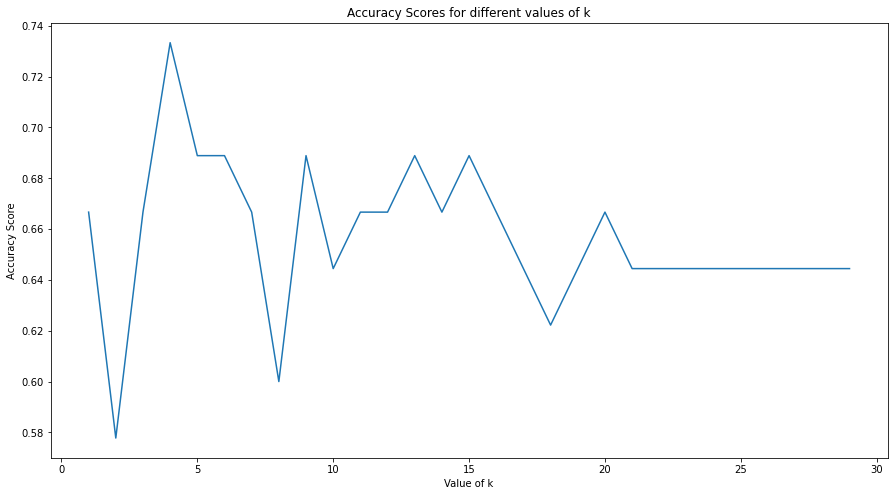

In [37]:
# checking accuracy score for k-value rangin from 1 to 26
k_range = list(range(1,30))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#predicting output for test data
pred = knn.predict(X_test)

print(knn.score(X_test, y_test))

0.7333333333333333


# Decision Trees

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#predicting output for test data
pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.9111111111111111
